<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

Перед нами стоит задача разработки метода защиты данных клиентов страховой компании, который не будет влиять на качетсво модели машинного обучения. По условиям задачи в данном исследовании будем использовать модель обучения - Линейную Регрессию. Для исследования предоставленны данные 5000 клиентов с указанем колличества страховыъ выплат для каждого клиента. Необходимо реализовать алгоритм преобразования данных на основе матричных операций, который не будет влиять на результаты обучения, т.е. вектор весов $w$ и величина сдвига предсказания $w_0$ должны остаться неизменными после преобразований. Результаты обучения модели необходимо проверить на изначальных данных и преобразованных, сравнив метрику r2 для каждой модели, если метрика не изменится, то данный алгоритм подходит для нашей задачи. Для проверки работоспособности алгоритма необходимо произвести обратные преобразования, что бы проверить возможность получить изнчальные данные имея ключ шифрования.

## Загрузка данных

Подключим библиотеки необходимые в исследовании.

In [53]:
import pandas as pd
import numpy as np
import math as mp

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

Открываем файл с данными.

In [2]:
file = '/datasets/insurance.csv'
try:
    data = pd.read_csv(file)
    print('Файл из директории', file, 'загружен')
except:
    print('При загрузке файла', file, 'произошел сбой')

Файл из директории insurance.csv загружен


Выведем первые 10 строк датафрейма и суммарную информацию о нем.

In [3]:
data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пропуски в датафрейме отсутствуют, типы данных соответствуют и изменений не трубуют.

Проверим возможные значения в каждом столбце, для выявления аномалий в данных. Для столбцов Зарплата и Возраст построим гистограммы для выявления выбросов.

In [5]:
data['Пол'].value_counts()

0    2505
1    2495
Name: Пол, dtype: int64

В столбце пол 2 значения и распределены в одинаковой пропорции.

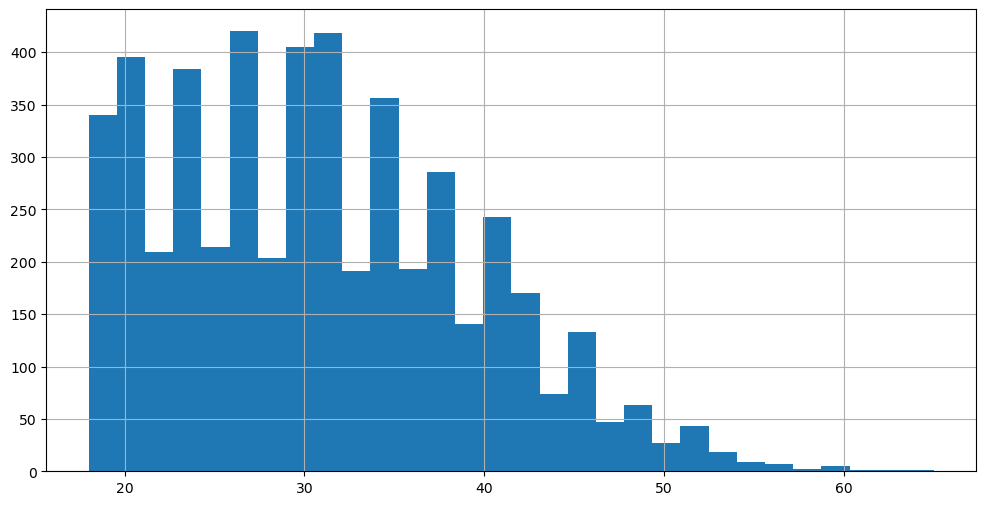

In [6]:
data['Возраст'].hist(bins=30, figsize=(12, 6));

В столбце Возраст наблюдаем нормальное распределение данных со сдвигом влево.

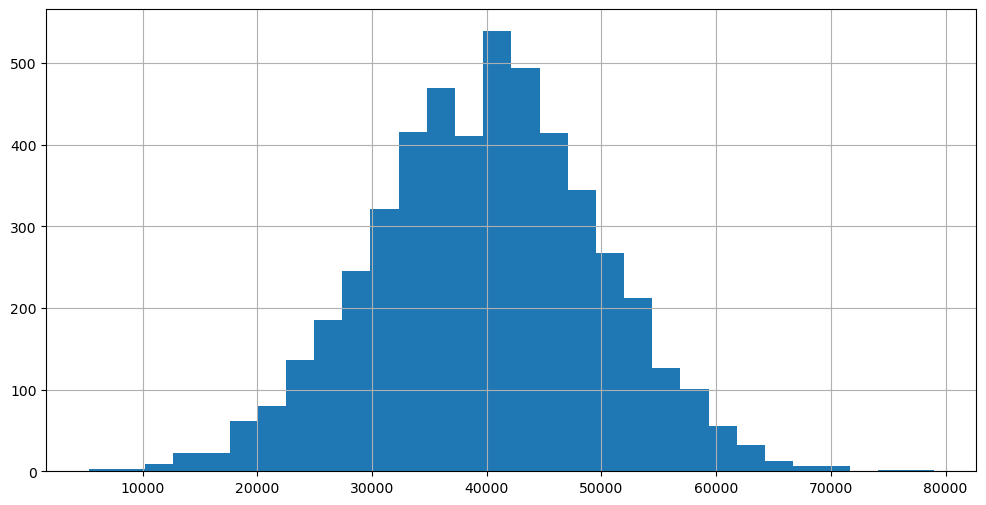

In [7]:
data['Зарплата'].hist(bins=30, figsize=(12, 6));

В столбце зарплата наблюдаем нормальное распределение без выбросов.

In [8]:
data['Члены семьи'].value_counts().sort_index()

0    1513
1    1814
2    1071
3     439
4     124
5      32
6       7
Name: Члены семьи, dtype: int64

В столбце Члены семьи, так же не наблюдается аномалий.

In [9]:
data['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

В столбце Страховые выплаты присутствуюет 6 значений от 0 до 5, соответствующие колличеству страховых выплат клиенту.

Проведем проверку мультиколлиниальности.

In [29]:
data.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


Между признаками отсутствует корреляция.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Если признаки умножають на обратимую матрицу изменится ли качество линейной регрессии?

**Ответ:** Не изменится

**Обоснование:** 

Если: 

- Матрица признаков - $X$

- обратимая матрица - $P$

- вектор целевого признака - $x$

- вектор весов целевого признака - $w$

- величина сдвига предсказания - $w_0$

Предсказания

$$
a = X w + w_0
$$

Формула обучения линейной регрессии

$$
w = (X^TX)^{-1}X^Tx
$$

Преобразуем выражение для w':

$$
w' = (Y^TY)^{-1} Y^Tx =
= ((XP)^T(XP))^{-1} (XP)^Tx =
= P^{-1}((XP)^{T}X)^{-1} (XP)^Tx =
= P^{-1}((XP)^{T}X)^{-1} P^TX^Tx =
= P^{-1}(P^TX^TX)^{-1} P^TX^Tx =
= P^{-1}(X^TX)^{-1}(P^T)^{-1} P^TX^Tx
$$

Сократим

$$
(P^{T})^{-1} P^T = P^{-1}(X^TX)^{-1} X^Tx
$$

Произведем замену

$$
w = (X^TX)^{-1}X^Tx = P^{-1}w
$$

Тогда: 

$$
w(x)= P^{-1}w
$$

Подставим для X' и w' в формулу для расчета a':

$$
a'=X'w' + w_0 = XPP^{-1}w + w_0 = Xw + w_0 = a
$$

Выражения тождественны. Векторы предсказаний совпали.

## Алгоритм преобразования

**Алгоритм преобразования предлагаю проводить в следующем порядке.**

- Отделяем целевой признак от набора данных
- Определяем колличество столцов в матрице признаков
- Генерируем и фиксируем случайную квадратную матрицу в качестве ключа шифрования размера колличества столбцов матрицы признаков
- Проверяем матрицу на обратимость, если матрица не обратимая, генерируем новую
- Производим матричное умножение набора данных и ключа шифровнаия
- Производим необходимые операции с датасетом
- Производим дешифрование с помощью матричного умножения преобразованного набора на обратную матрицу ключа шифрования

**Обоснование**

Произведение матрицы состоит из всех возможных комбинаций скалярных произведений вектор-строк матрицы Features и вектор-столбцов матрицы Random. Таким образом мы произведем умножение каждого набора признаков (строка-вектор) из Features на одинаковые наборы векторов (столбец - вектор) из Random и запишем их в новый вектор - строку. Соответственно итоговые веса каждого такого вектора будут примерно соотносится с весами набора признаков для каждого нового набора векторов в результирующей матрице.

## Проверка алгоритма

Отделяем целевой признак и обучающие признаки

In [10]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

display(features.head())
display(target.head())

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


0    0
1    1
2    0
3    0
4    0
Name: Страховые выплаты, dtype: int64

Определим размер квадратной обратимой матрицы

In [33]:
size = features.shape[1]
print('Размер обратимой матрицы для ключа шифрования:', size, 'x', size)

Размер обратимой матрицы для ключа шифрования: 4 x 4


Сгенерируем случайную обратимую матрицу

In [48]:
print(round(pd.DataFrame(np.dot(z, np.linalg.inv(z))), 0))
print(np.eye(size))

     0    1    2    3
0  1.0 -0.0  0.0  0.0
1 -0.0  1.0  0.0 -0.0
2  0.0 -0.0  1.0 -0.0
3  0.0 -0.0  0.0  1.0
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [51]:
check = False
while check == False:
    z = np.random.normal(3, 2.5, size=(size, size))
    if (np.dot(z, np.linalg.inv(z))).all() == (np.eye(size)).all():
        check = True
        print('Обратная матрица найдена')
        print(z)

Обратная матрица найдена
[[ 1.36363299  2.45900408  5.62300036  8.2694739 ]
 [ 2.71076641 -0.71944861 -1.23748362  1.71957696]
 [ 4.66414594  3.23516205  5.68547003  2.17811799]
 [ 2.21447163  4.67661265  3.39268047  1.3196956 ]]


Разделим выборки на обучающую и валидационную

In [61]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)

Обучим модель на изначальных данных без шифрации через умножения матриц и подсчитаем метрику r2

In [67]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions1 = model.predict(features_valid)
print(r2_score(target_valid, predictions1))

0.42375177725680135


Умножим матрицу признаков на обратимую матрицу

In [63]:
features_mult = pd.DataFrame(np.dot(features, z), columns=features.columns)

print(features_mult.head())

features_train_mult, features_valid_mult, target_train_mult, target_valid_mult = train_test_split(
    features_mult, target, test_size=0.4, random_state=12345)

             Пол        Возраст       Зарплата    Члены семьи
0  231456.358323  160441.675937  281957.592545  108114.744159
1  177364.455578  122907.739902  215994.329731   82848.903878
2   98025.677038   67917.539054  119358.983692   45790.345534
3  194556.240880  134900.502317  237064.898628   90866.270715
4  121811.474217   84420.043965  148361.741350   56905.297183


Обучим модель на данных прошедших шифрование через умножение матриц и подсчитаем метрику r2

In [66]:
model_1 = LinearRegression()
model_1.fit(features_train_mult, target_train_mult)
predictions2 = model_1.predict(features_valid_mult)
print(r2_score(target_valid_mult, predictions2))

0.42375177725676105


Проверим соответствие метрик для двух моделей без и после шифрования

In [68]:
print('Совпадение метрик на ', r2_score(target_valid, predictions1)/r2_score(target_valid_mult, predictions2)*100, '%')

Совпадение метрик на  100.0000000000095 %


In [70]:
print('Совпадение предсказаний',r2_score(predictions1, predictions2))

Совпадение предсказаний 1.0


Проверим возможность дешифрации данных

In [71]:
features_back = pd.DataFrame(np.dot(features_mult, np.linalg.inv(z)), columns=features.columns)
print('Матрица признаков после дешифрации')
display(features_back.head())
print('Матрица признаков после дешифрации и округления до целых чисел')
display(round(features_back.head(), 0))
print('Изначальная матрица признаков')
display(features.head())

Матрица признаков после дешифрации


,Пол,Возраст,Зарплата,Члены семьи
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,1.818989e-12,46.0,38000.0,1.000000e+00
2,9.094947e-13,29.0,21000.0,-3.637979e-12
3,0.000000e+00,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-3.637979e-12


Матрица признаков после дешифрации и округления до целых чисел


,Пол,Возраст,Зарплата,Члены семьи
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,-0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,-0.0


Изначальная матрица признаков


,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


Проверим совпадение значений между изначальной матрицей и матрицей после дешифрации и округления

In [18]:
(round(features_back, 0)).isin(features).value_counts()

Пол   Возраст  Зарплата  Члены семьи
True  True     True      True           4960
               False     True             40
dtype: int64

Выведем строки где обнаружено несовпадение признаков

In [19]:
features_back_round = round(features_back, 0)

index = features_back_round[features_back_round['Зарплата'] != features['Зарплата']].index

display(features_back_round.loc[index].head())
display(features.loc[index].head())

,Пол,Возраст,Зарплата,Члены семьи
80,1.0,41.0,32700.0,-0.0
159,1.0,19.0,64900.0,2.0
313,0.0,25.0,32700.0,1.0
392,1.0,43.0,32700.0,1.0
448,1.0,32.0,32700.0,2.0


,Пол,Возраст,Зарплата,Члены семьи
80,1,41.0,32700.0,0
159,1,19.0,64900.0,2
313,0,25.0,32700.0,1
392,1,43.0,32700.0,1
448,1,32.0,32700.0,2


Значения совпадают, видимо в изначальной таблице в столбце зарплата есть хвост в 10-16 знаке после нуля, округлим обе таблицы и сравним

In [20]:
(round(features_back, 0)).isin(round(features, 0)).value_counts()

Пол   Возраст  Зарплата  Члены семьи
True  True     True      True           5000
dtype: int64

Таблицы совпадают полностью.

## Вывод

В текущем исследовании была рассмотрена задача шифрования пользовательских данных. Результатом исследования является полностью проверенный алогритм шифрования, который не влияет на результаты машинного обучения, и дешифрования данных.

Перед проведением исследования был проведен анализ предоставленных данных на выбросы, аномалии и соответствие поставленной задачи.

Разработанный в результате алгоритм имеет математическое обоснование и практическое подверждение на реализованном коде.